# Importamos librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

### El Conjunto de datos del CSV.

In [3]:
df = pd.read_csv("glassdoor.csv")

Rescatado de: https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/code

### Explorar y visualizar los datos para obtener información

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [6]:
df.tail()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225
999,Financial Analyst,Male,60,1,PhD,Sales,2,123108,2244


In [7]:
df.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [8]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


Desde el df.info() nos dimos cuenta que los datos están completos, pero hay que verificar.

In [9]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

Ya sabemos que tenemos 4 campos que son object, así que dummificamos los datos, o sea, los convertimos en números para trabajar mejor con ellos.

In [10]:
# Crear una copia del DataFrame original
df_numericos = df.copy()

# Inicializar el codificador
encoder = LabelEncoder()

# Obtener las columnas categóricas
cols_categoricas = df_numericos.select_dtypes(include=["object"]).columns

# Convertir las columnas categóricas a numéricas
conversion_log = {}
for col in cols_categoricas:
    df_numericos[col] = encoder.fit_transform(df_numericos[col])
    conversion_log[col] = {
        "original": sorted(df[col].unique().tolist()),
        "transformado": sorted(df_numericos[col].unique().tolist())
    }

df_numericos.head(), conversion_log


(   JobTitle  Gender  Age  PerfEval  Education  Dept  Seniority  BasePay  Bonus
 0         3       0   18         5          0     3          2    42363   9938
 1         8       1   21         5          0     2          5   108476  11128
 2         9       0   19         4          3     0          5    90208   9268
 3         8       1   20         5          2     4          4   108080  10154
 4         3       1   26         5          2     1          5    99464   9319,
 {'JobTitle': {'original': ['Data Scientist',
    'Driver',
    'Financial Analyst',
    'Graphic Designer',
    'IT',
    'Manager',
    'Marketing Associate',
    'Sales Associate',
    'Software Engineer',
    'Warehouse Associate'],
   'transformado': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
  'Gender': {'original': ['Female', 'Male'], 'transformado': [0, 1]},
  'Education': {'original': ['College', 'High School', 'Masters', 'PhD'],
   'transformado': [0, 1, 2, 3]},
  'Dept': {'original': ['Administration',
    'Engin

Arriba observamos que tipo de valor se la asigno a cada uno.

Aquí abajo verificamos que efectivamente los datos ahora son totalmente numericos

In [11]:
df_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   JobTitle   1000 non-null   int32
 1   Gender     1000 non-null   int32
 2   Age        1000 non-null   int64
 3   PerfEval   1000 non-null   int64
 4   Education  1000 non-null   int32
 5   Dept       1000 non-null   int32
 6   Seniority  1000 non-null   int64
 7   BasePay    1000 non-null   int64
 8   Bonus      1000 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 54.8 KB


Vemos las matriz de correlación

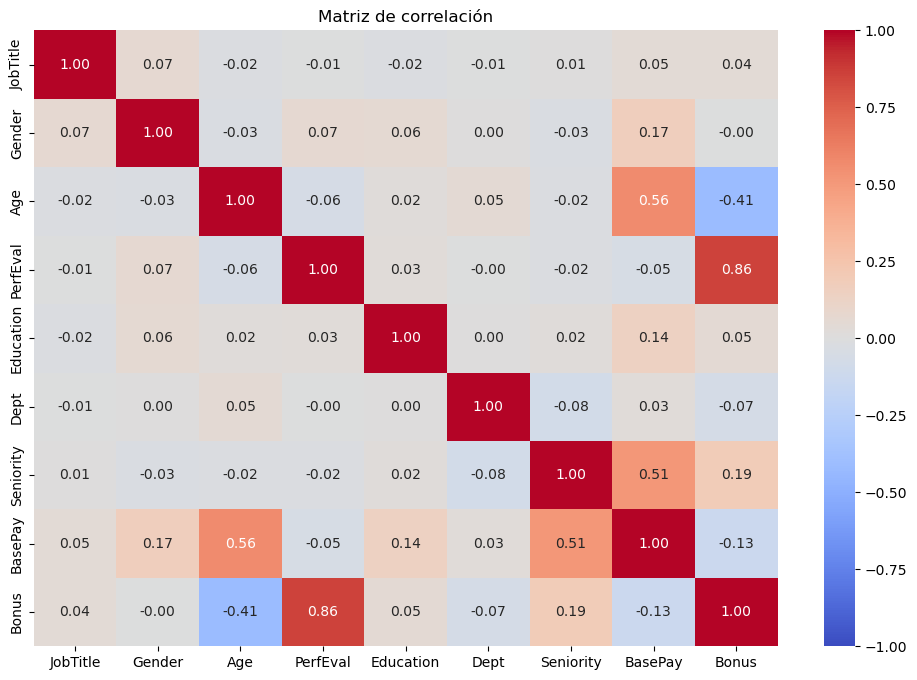

In [16]:
plt.figure(figsize=(12, 8))
corr = df_numericos.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

Ahora comparamos con gráficas los datos que tienen alta o baja correlación

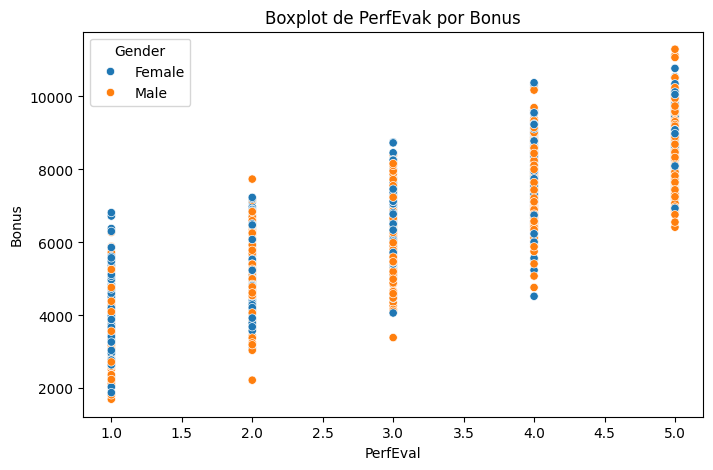

In [39]:
plt.figure(figsize=(8, 5))
#sns.boxplot(x='PerfEval', y='Bonus', data=df, palette="hls")
#sns.violinplot(x='PerfEval', y='Bonus', data=df)
sns.scatterplot(x='PerfEval', y='Bonus', hue='Gender', data=df)
plt.title('Boxplot de PerfEvak por Bonus')
plt.show()

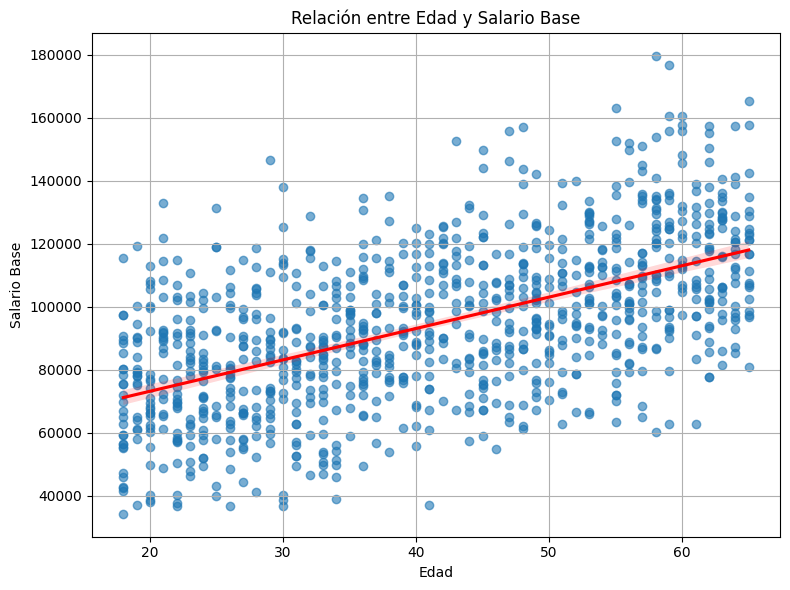

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='BasePay', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Relación entre Edad y Salario Base')
plt.xlabel('Edad')
plt.ylabel('Salario Base')
plt.grid(True)
plt.tight_layout()
plt.show()

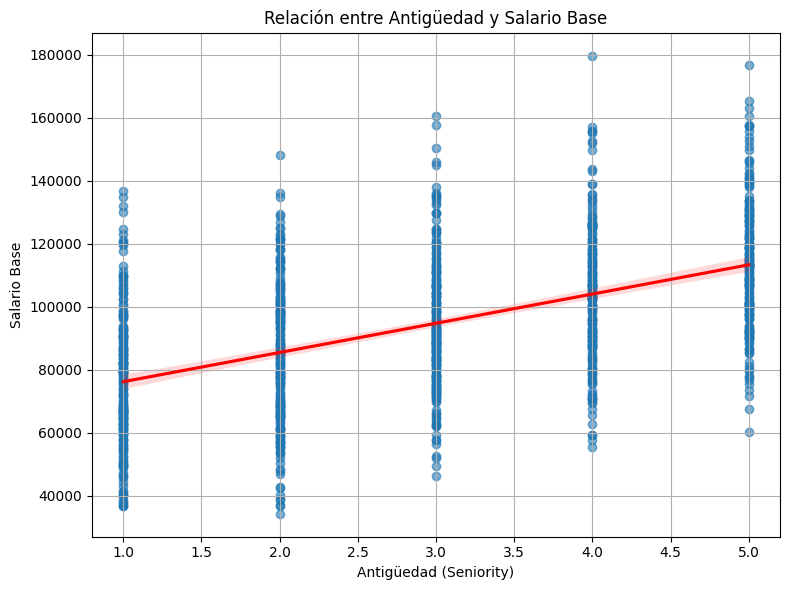

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Seniority', y='BasePay', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Relación entre Antigüedad y Salario Base')
plt.xlabel('Antigüedad (Seniority)')
plt.ylabel('Salario Base')
plt.grid(True)
plt.tight_layout()
plt.show()


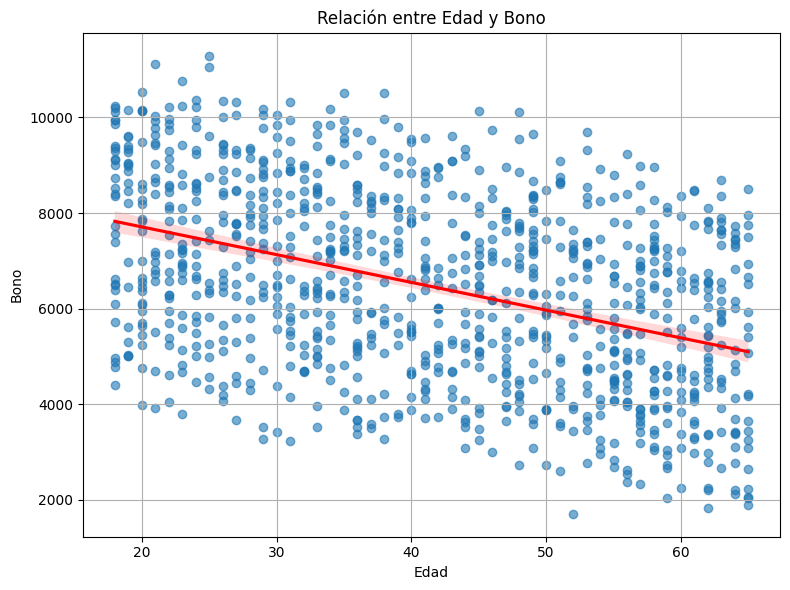

In [44]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Bonus', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Relación entre Edad y Bono')
plt.xlabel('Edad')
plt.ylabel('Bono')
plt.grid(True)
plt.tight_layout()
plt.show()

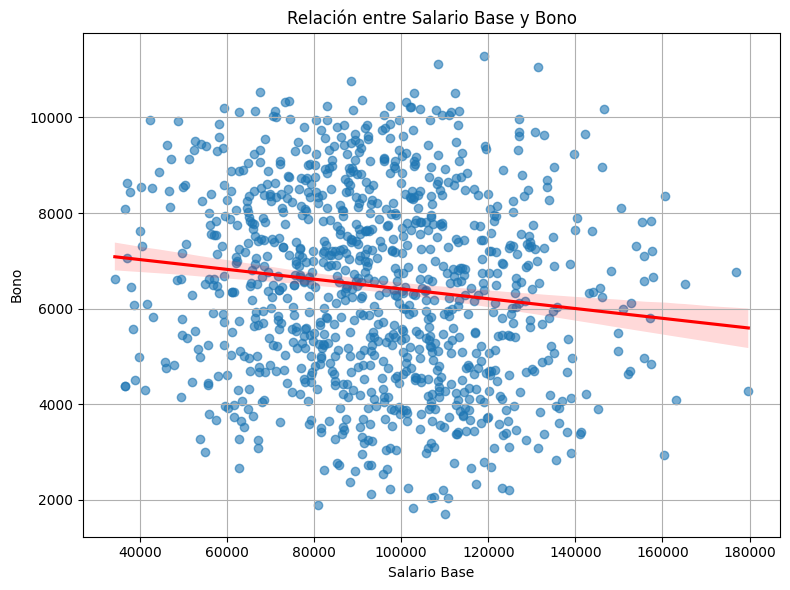

In [45]:
plt.figure(figsize=(8, 6))
sns.regplot(x='BasePay', y='Bonus', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Relación entre Salario Base y Bono')
plt.xlabel('Salario Base')
plt.ylabel('Bono')
plt.grid(True)
plt.tight_layout()
plt.show()


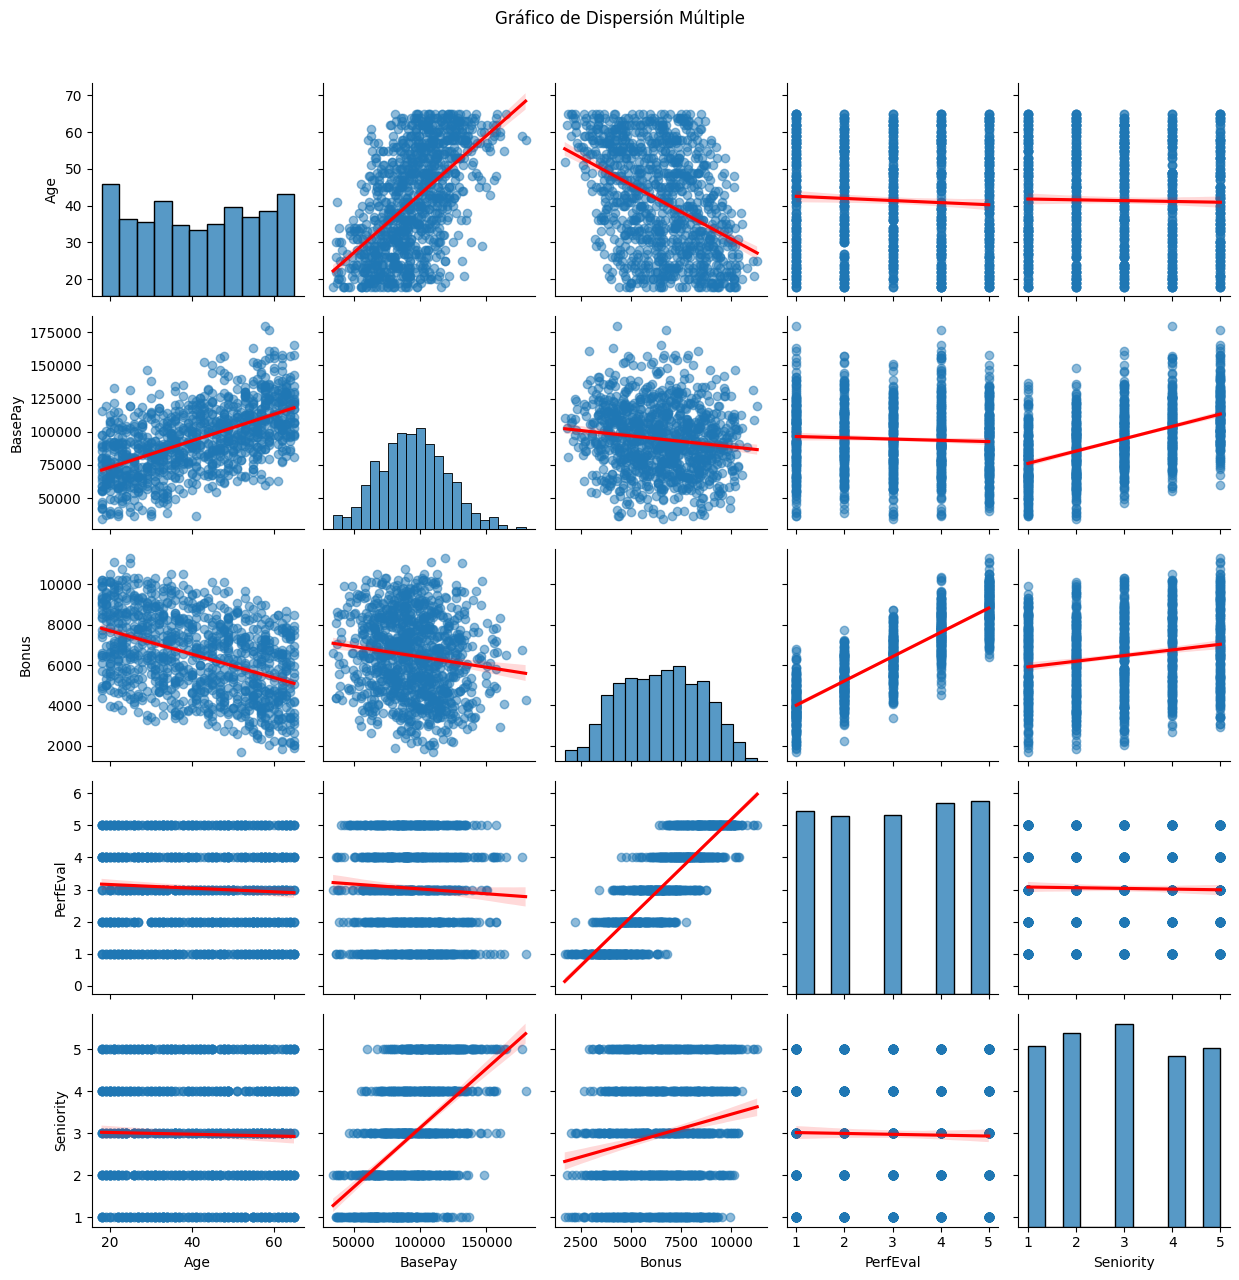

In [47]:
# Seleccionamos solo las columnas numéricas más correlacionadas
columnas_interes = ['Age', 'BasePay', 'Bonus', 'PerfEval', 'Seniority']

# Crear el pairplot
sns.pairplot(df[columnas_interes], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha':0.5}})
plt.suptitle("Gráfico de Dispersión Múltiple", y=1.02)
plt.tight_layout()
plt.show()

### De estos datos detectamos que podemos realizar una IA que vea la brecha salarial por genero

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assume df is your cleaned DataFrame
X = df.drop(columns=['BasePay'])
y = df['BasePay']

# Convert categorical to dummies
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Using LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Analizamos el impacto que tiene el genero

In [18]:
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients['Gender_Male'])

918.607695089624


### Verificar significancia con un T-test

In [20]:
from scipy.stats import ttest_ind

male_pay = df[df['Gender'] == 'Male']['BasePay']
female_pay = df[df['Gender'] == 'Female']['BasePay']
t_stat, p_value = ttest_ind(male_pay, female_pay)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

T-statistic: 5.3761, p-value: 0.0000
